In [407]:
import os
os.environ["OMP_NUM_THREADS"] = '3'
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [203]:
# root dfs
cust = pd.read_feather('created_data/customer.feather')
acc = pd.read_feather('created_data/account.feather')
tran = pd.read_feather('created_data/transactions.feather')


#account info
acc_cheq = pd.read_feather('created_data/account_checking.feather')
acc_cred = pd.read_feather('created_data/account_credit.feather')
acc_save = pd.read_feather('created_data/account_saving.feather')

#transaction info
tran_cheq = pd.read_feather('created_data/transaction_checking.feather')
tran_cred = pd.read_feather('created_data/transaction_credit.feather')
tran_save = pd.read_feather('created_data/transaction_saving.feather')


In [419]:
main_clust = cust[['income','age']]

In [409]:
standard = StandardScaler()
robust = RobustScaler()


In [410]:
x_stan = standard.fit_transform(main_clust)
x_rob = robust.fit_transform(main_clust)

In [411]:
def plot_clusters(x,y_res,plt_cluster_centers = False):
    x_centroids = []
    y_centroids = []

    for cluster in set(y_res):
        X = x[y_res == cluster,0]
        Y = x[y_res == cluster,1]

        x_centroids.append(np.mean(X))
        y_centroids.append(np.mean(Y))
        plt.scatter(X,
                    Y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    if plt_cluster_centers:
        plt.scatter(x_centroids,
                    y_centroids,
                    marker='*',
                    c='magenta',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [102]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            random_state=0)

In [103]:
def plot_elbow(X, max_clusters = 10):
    joints = []
    for i in range(1,max_clusters+1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        joints.append(km.inertia_)
    tmp_df = pd.DataFrame({'Number of Clusters' : range(1,max_clusters+1),'Joints':joints})
    fig=px.line(tmp_df, x= 'Number of Clusters',y='Joints',markers=True)
    fig.show()
    

In [412]:
y_stand = km.fit_predict(x_stan)
y_rob = km.fit_predict(x_rob)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [105]:
plot_elbow(x_stan)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a m

In [106]:
plot_elbow(x_rob)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a m

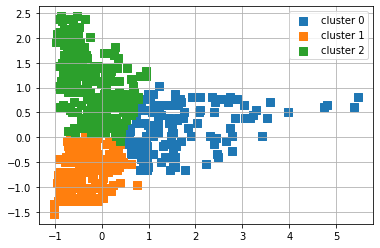

In [107]:
plot_clusters(x_stan,y_stand)

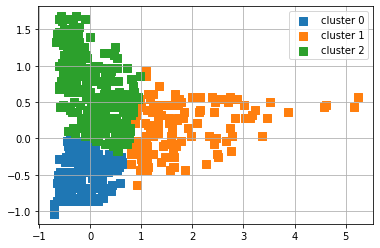

In [108]:
plot_clusters(x_rob,y_rob)

In [116]:
pd.Series(y_rob).replace({0:1,1:0})

0      2
1      2
2      1
3      0
4      0
      ..
742    1
743    2
744    0
745    1
746    1
Length: 747, dtype: int32

(array([[143.,   0.,   0.,   0.,   0., 327.,   0.,   0.,   0., 277.],
        [142.,   0.,   0.,   0.,   0., 311.,   0.,   0.,   0., 294.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 2 BarContainer objects>)

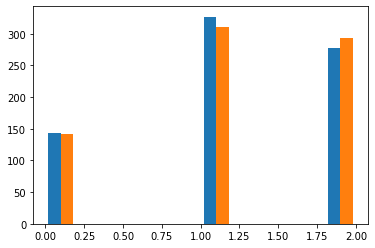

In [117]:
plt.hist([y_stand,pd.Series(y_rob).replace({0:1,1:0})])


In [413]:
def plot_dendrogram(X,method='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean Distances")
    plt.xlabel("Points")
    plt.show()

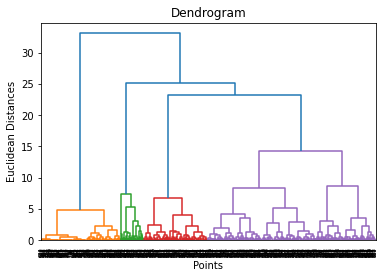

In [120]:
plot_dendrogram(x_stan)

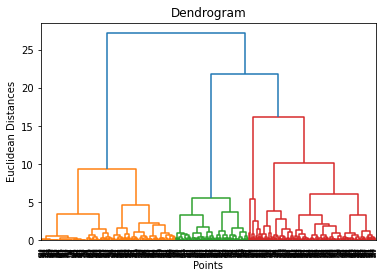

In [121]:
plot_dendrogram(x_rob)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



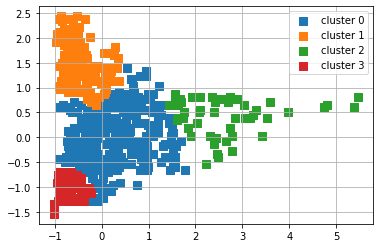

In [414]:
hier_stan = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
y_hir_stan = hier_stan.fit_predict(x_stan)
plot_clusters(x_stan,y_hir_stan)

In [420]:
main_clust = pd.concat([main_clust,pd.Series(y_hir_stan,name='clust')],axis=1)
main_clust

,income,age,clust
0,26150,46,0
1,6605,71,1
2,18548,38,0
3,47668,54,0
4,44554,59,0
...,...,...,...
742,14795,36,0
743,26387,56,0
744,61300,50,2
745,15100,37,0


In [423]:
x_stan

array([[ 0.1541846 ,  0.18431237],
       [-0.72652421,  1.49307037],
       [-0.18836584, -0.23449019],
       ...,
       [ 1.73806357,  0.39371365],
       [-0.34373468, -0.28684051],
       [-0.21869161, -1.28149658]])

In [429]:
main_clust[main_clust['clust'] == 0].mean()

income    27584.164894
age          42.202128
clust         0.000000
dtype: float64

3.7424706463108754

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



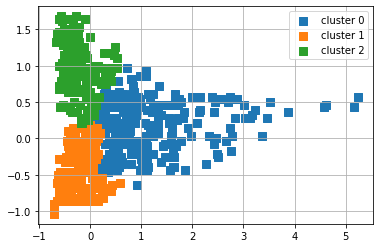

In [123]:
hier_rob = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
y_hir_rob = hier_rob.fit_predict(x_rob)
plot_clusters(x_rob,y_hir_rob)

In [218]:
tran_cheq['type_transaction'] = 'chequing'
tran_cred['type_transaction'] = 'credit'
tran_save['type_transaction'] = 'savings'
new_tran = pd.concat([tran_cheq,tran_cred,tran_save])
all_cust_trans = cust.merge(new_tran, on='cust_id',how='inner')

In [205]:
all_cust_trans

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,state_code,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,type_transaction
0,1362691,26150,46,5,1,M,2,,89194,Las Vegas,NV,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,1362487,6605,71,1,0,M,2,,90159,Los Angeles,CA,5.0,0.00,0.00,0.00,2568.01,1995-02-10,14.0,IQ,chequing
2,1362487,6605,71,1,0,M,2,,90159,Los Angeles,CA,10.0,3.60,0.00,3.60,2453.03,1995-03-31,23.0,IN,chequing
3,1362487,6605,71,1,0,M,2,,90159,Los Angeles,CA,15.0,2.62,0.00,2.62,2097.29,1995-04-30,23.0,IN,chequing
4,1362487,6605,71,1,0,M,2,,90159,Los Angeles,CA,20.0,-154.15,-154.15,0.00,1714.47,1995-06-05,14.0,TR,chequing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77638,1363303,17875,18,3,0,F,1,,90029,Los Angeles,CA,6.0,43.72,43.72,0.00,-249.05,1995-06-04,NaN,PM,credit
77639,1363303,17875,18,3,0,F,1,,90029,Los Angeles,CA,46.0,-191.29,-191.29,0.00,-191.29,1995-11-09,21.0,CG,credit
77640,1363303,17875,18,3,0,F,1,,90029,Los Angeles,CA,53.0,426.05,426.05,0.00,0.00,1995-12-05,19.0,PM,credit
77641,1363303,17875,18,3,0,F,1,,90029,Los Angeles,CA,13.0,-79.74,-79.74,0.00,-1000.00,1995-06-21,11.0,CG,credit


In [159]:
test_df = all_cust_trans.groupby(['cust_id','type_transaction'],as_index=False).size()
test_df

,cust_id,type_transaction,size
0,1362480,chequing,99
1,1362480,credit,32
2,1362480,savings,26
3,1362484,chequing,99
4,1362484,credit,55
...,...,...,...
1392,1363492,savings,25
1393,1363493,chequing,99
1394,1363493,savings,19
1395,1363495,chequing,99


In [219]:
temp = tran_cheq.groupby('cust_id',as_index=False).size()
temp.columns = ['cust_id','number_cheq_tran']
all_cust_trans = all_cust_trans.merge(temp,how='outer',on='cust_id')
all_cust_trans

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,...,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,type_transaction,number_cheq_tran
0,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,5,0.00,0.00,0.00,2568.01,1995-02-10,14.0,IQ,chequing,52.0
1,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,10,3.60,0.00,3.60,2453.03,1995-03-31,23.0,IN,chequing,52.0
2,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,15,2.62,0.00,2.62,2097.29,1995-04-30,23.0,IN,chequing,52.0
3,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,20,-154.15,-154.15,0.00,1714.47,1995-06-05,14.0,TR,chequing,52.0
4,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,25,-10.00,-10.00,0.00,2119.95,1995-06-30,23.0,FP,chequing,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77555,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,6,43.72,43.72,0.00,-249.05,1995-06-04,NaN,PM,credit,99.0
77556,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,46,-191.29,-191.29,0.00,-191.29,1995-11-09,21.0,CG,credit,99.0
77557,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,53,426.05,426.05,0.00,0.00,1995-12-05,19.0,PM,credit,99.0
77558,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,13,-79.74,-79.74,0.00,-1000.00,1995-06-21,11.0,CG,credit,99.0


In [220]:
temp = tran_cred.groupby('cust_id',as_index=False).size()
temp.columns = ['cust_id','number_cred_tran']
all_cust_trans = all_cust_trans.merge(temp,how='outer',on='cust_id')
all_cust_trans

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,...,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,type_transaction,number_cheq_tran,number_cred_tran
0,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,0.00,0.00,0.00,2568.01,1995-02-10,14.0,IQ,chequing,52.0,32.0
1,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,3.60,0.00,3.60,2453.03,1995-03-31,23.0,IN,chequing,52.0,32.0
2,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,2.62,0.00,2.62,2097.29,1995-04-30,23.0,IN,chequing,52.0,32.0
3,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,-154.15,-154.15,0.00,1714.47,1995-06-05,14.0,TR,chequing,52.0,32.0
4,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,-10.00,-10.00,0.00,2119.95,1995-06-30,23.0,FP,chequing,52.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77555,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,43.72,43.72,0.00,-249.05,1995-06-04,NaN,PM,credit,99.0,61.0
77556,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,-191.29,-191.29,0.00,-191.29,1995-11-09,21.0,CG,credit,99.0,61.0
77557,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,426.05,426.05,0.00,0.00,1995-12-05,19.0,PM,credit,99.0,61.0
77558,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,-79.74,-79.74,0.00,-1000.00,1995-06-21,11.0,CG,credit,99.0,61.0


In [246]:
temp = tran_save.groupby('cust_id',as_index=False).size()
temp.columns = ['cust_id','number_save_tran']
all_cust_trans = all_cust_trans.merge(temp,how='outer',on='cust_id')
all_cust_trans = all_cust_trans.fillna(0)

In [250]:
all_cust_trans['cust_id'].nunique()

664

In [268]:
num_cust_tran = all_cust_trans.groupby(['cust_id','number_cheq_tran','number_save_tran','number_cred_tran'],as_index=False).size()
num_cust_tran.drop('size',inplace=True,axis=1)
num_cust_tran

,cust_id,number_cheq_tran,number_save_tran,number_cred_tran
0,1362480,99.0,26.0,32.0
1,1362484,99.0,33.0,55.0
2,1362485,99.0,0.0,72.0
3,1362486,25.0,25.0,0.0
4,1362487,52.0,19.0,32.0
...,...,...,...,...
659,1363490,0.0,12.0,0.0
660,1363491,0.0,18.0,0.0
661,1363492,99.0,25.0,29.0
662,1363493,99.0,19.0,0.0


In [262]:
tran_save_mean = tran_save.groupby('cust_id',as_index=False).mean()
tran_save_mean.drop(['tran_id','tran_time','principal_amt','interest_amt','new_balance'],axis=1, inplace=True)
tran_save_mean.columns = ['cust_id','avg_save_tran_amt']

C:\Users\John\AppData\Local\Temp\ipykernel_19932\2076849735.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [266]:
tran_cred_mean = tran_cred.groupby('cust_id',as_index=False).mean()
tran_cred_mean.drop(['tran_id','tran_time','principal_amt','interest_amt','new_balance'],axis=1, inplace=True)
tran_cred_mean.columns = ['cust_id','avg_cred_tran_amt']

C:\Users\John\AppData\Local\Temp\ipykernel_19932\1241878395.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [267]:
tran_cheq_mean = tran_cheq.groupby('cust_id',as_index=False).mean()
tran_cheq_mean.drop(['tran_id','tran_time','principal_amt','interest_amt','new_balance'],axis=1, inplace=True)
tran_cheq_mean.columns = ['cust_id','avg_cheq_tran_amt']

C:\Users\John\AppData\Local\Temp\ipykernel_19932\1472124976.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [272]:
num_cust_tran = num_cust_tran.merge(tran_save_mean,how='outer',on='cust_id')
num_cust_tran = num_cust_tran.merge(tran_cred_mean,how='outer',on='cust_id')
num_cust_tran = num_cust_tran.merge(tran_cheq_mean,how='outer',on='cust_id')

In [274]:
num_cust_tran = num_cust_tran.fillna(0)

In [275]:
num_cust_tran

,cust_id,number_cheq_tran,number_save_tran,number_cred_tran,avg_save_tran_amt,avg_cred_tran_amt,avg_cheq_tran_amt
0,1362480,99.0,26.0,32.0,18.550769,60.895625,-2.474646
1,1362484,99.0,33.0,55.0,58.474545,16.797636,-25.435758
2,1362485,99.0,0.0,72.0,0.000000,-10.572639,-1.659495
3,1362486,25.0,25.0,0.0,-6.729600,0.000000,-37.604800
4,1362487,52.0,19.0,32.0,-33.623158,-47.987187,-26.513269
...,...,...,...,...,...,...,...
659,1363490,0.0,12.0,0.0,2.853333,0.000000,0.000000
660,1363491,0.0,18.0,0.0,-10.423889,0.000000,0.000000
661,1363492,99.0,25.0,29.0,6.563200,-61.280690,-12.570404
662,1363493,99.0,19.0,0.0,11.706842,0.000000,-41.110505


In [283]:
new_cust = cust.merge(num_cust_tran, how='inner', on='cust_id')
new_cust.drop(['years_with_bank','nbr_children','gender','marital_status','name_prefix','postal_code','city_name','state_code'],axis=1,inplace=True)
new_cust

,cust_id,income,age,number_cheq_tran,number_save_tran,number_cred_tran,avg_save_tran_amt,avg_cred_tran_amt,avg_cheq_tran_amt
0,1362487,6605,71,52.0,19.0,32.0,-33.623158,-47.987187,-26.513269
1,1363160,18548,38,0.0,48.0,68.0,0.197917,5.588676,0.000000
2,1362752,47668,54,93.0,12.0,15.0,0.755833,160.443333,-5.203548
3,1362548,44554,59,99.0,12.0,22.0,0.315000,317.147727,-54.895859
4,1363017,0,16,99.0,24.0,63.0,37.097083,-15.176190,-25.734949
...,...,...,...,...,...,...,...,...,...
659,1363324,14795,36,44.0,0.0,0.0,0.000000,0.000000,-38.292273
660,1362895,26387,56,0.0,28.0,27.0,-2.632500,-47.680370,0.000000
661,1362569,61300,50,99.0,0.0,28.0,0.000000,-328.571429,-8.894848
662,1363364,15100,37,99.0,0.0,75.0,0.000000,0.247333,-10.008081


In [287]:
acc['final_balance'] = acc['ending_balance'] - acc['starting_balance']
acc

,acct_nbr,cust_id,acct_type,starting_balance,ending_balance,final_balance
0,13628063,1362806,SV,1430.22,284.58,-1145.64
1,13627090,1362709,CC,266.34,496.15,229.81
2,13628360,1362836,CC,55.90,1000.00,944.10
3,13633112,1363311,CK,11017.13,968.46,-10048.67
4,13633610,1363361,CC,849.37,462.28,-387.09
...,...,...,...,...,...,...
1404,13625560,1362556,CC,1433.94,20.00,-1413.94
1405,13626240,1362624,CC,632.75,1400.00,767.25
1406,13628750,1362875,CC,2810.91,3000.00,189.09
1407,13626543,1362654,SV,784.53,622.46,-162.07


In [292]:
balance_mean = acc.groupby('cust_id',as_index=False).mean()
balance_mean.drop(['starting_balance','ending_balance'],axis=1,inplace=True)
balance_mean

C:\Users\John\AppData\Local\Temp\ipykernel_19932\3435864507.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,cust_id,final_balance
0,1362480,-450.503333
1,1362484,-499.930000
2,1362485,326.665000
3,1362486,-554.180000
4,1362487,-156.823333
...,...,...
660,1363490,34.240000
661,1363491,-187.630000
662,1363492,553.223333
663,1363493,-1282.503333


In [ ]:
new_cust = new_cust.merge(balance_mean,on='cust_id',how='inner')
new_cust

In [347]:
new_cust.describe()

,cust_id,income,age,number_cheq_tran,number_save_tran,number_cred_tran,avg_save_tran_amt,avg_cred_tran_amt,avg_cheq_tran_amt,final_balance
count,6.640000e+02,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,1.362990e+06,23079.980422,42.661145,69.584337,16.850904,30.371988,8.120326,30.946140,-13.141909,-436.750853
std,2.956475e+02,22215.443625,18.827340,41.791793,15.576127,27.967259,25.777548,402.600914,24.456391,1601.794447
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,0.000000,-91.625385,-351.851852,-174.515758,-11029.145000
25%,1.362727e+06,7458.000000,28.000000,24.750000,0.000000,0.000000,0.000000,-11.215681,-24.381566,-957.051250
50%,1.362992e+06,17598.000000,41.000000,99.000000,16.500000,30.000000,0.000000,0.000000,-2.073586,-162.988333
75%,1.363249e+06,31532.250000,56.000000,99.000000,28.000000,49.000000,10.664444,2.784354,0.000000,314.532500
max,1.363495e+06,144157.000000,89.000000,99.000000,62.000000,155.000000,201.453455,8735.140000,65.337778,7006.520000


In [348]:
new_cust[new_cust['age'] < 18]

,cust_id,income,age,number_cheq_tran,number_save_tran,number_cred_tran,avg_save_tran_amt,avg_cred_tran_amt,avg_cheq_tran_amt,final_balance
4,1363017,0,16,99.0,24.0,63.0,37.097083,-15.17619,-25.734949,-219.143333
9,1363343,0,15,0.0,41.0,0.0,34.241951,0.00000,0.000000,1403.830000
12,1363404,0,17,99.0,33.0,0.0,13.225455,0.00000,5.699798,500.360000
29,1362893,0,15,0.0,22.0,0.0,31.175455,0.00000,0.000000,685.860000
43,1362729,0,13,0.0,12.0,0.0,0.150000,0.00000,0.000000,1.800000
...,...,...,...,...,...,...,...,...,...,...
629,1362897,0,17,99.0,0.0,0.0,0.000000,0.00000,-1.007980,-99.790000
638,1362550,0,15,0.0,26.0,0.0,-5.783077,0.00000,0.000000,-150.900000
640,1363080,0,13,0.0,21.0,0.0,17.639524,0.00000,0.000000,370.430000
641,1362815,0,17,99.0,26.0,20.0,-9.436538,-49.89400,-19.812929,-402.336667


In [297]:
new_clust = new_cust.drop('cust_id',axis=1)

In [ ]:
x_stan = standard.fit_transform(new_clust)
x_rob = robust.fit_transform(new_clust)

In [303]:
plot_elbow(x_stan)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a m

In [304]:
plot_elbow(x_rob)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a m

In [314]:
km = KMeans(n_clusters=5,
            init='k-means++',
            n_init=10,
            random_state=0)

In [315]:
y_stand = km.fit_predict(x_stan)
y_rob = km.fit_predict(x_rob)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



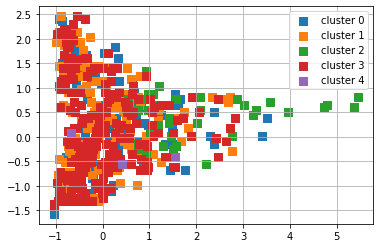

In [316]:
plot_clusters(x_stan,y_stand) #stand says k=5

In [318]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            random_state=0)
y_rob = km.fit_predict(x_rob)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



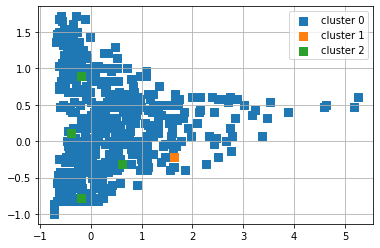

In [319]:
plot_clusters(x_rob,y_rob) #Rob says k=3

In [321]:
clust_no_trans = new_cust.drop(['cust_id','number_cheq_tran','number_save_tran','number_cred_tran'],axis=1)
clust_no_trans

,income,age,avg_save_tran_amt,avg_cred_tran_amt,avg_cheq_tran_amt,final_balance
0,6605,71,-33.623158,-47.987187,-26.513269,-156.823333
1,18548,38,0.197917,5.588676,0.000000,-180.635000
2,47668,54,0.755833,160.443333,-5.203548,-925.666667
3,44554,59,0.315000,317.147727,-54.895859,-4109.160000
4,0,16,37.097083,-15.176190,-25.734949,-219.143333
...,...,...,...,...,...,...
659,14795,36,0.000000,0.000000,-38.292273,-1685.040000
660,26387,56,-2.632500,-47.680370,0.000000,613.145000
661,61300,50,0.000000,-328.571429,-8.894848,4159.705000
662,15100,37,0.000000,0.247333,-10.008081,-494.345000


In [363]:
x_stan = standard.fit_transform(clust_no_trans)
x_rob = robust.fit_transform(clust_no_trans)

In [364]:
x_stan

array([[-0.7421594 ,  1.50633174, -1.62059453, -0.19620629, -0.54715517,
         0.17489045],
       [-0.20415514, -0.24775983, -0.30756927, -0.0630316 ,  0.53776602,
         0.16001362],
       [ 1.10763287,  0.60270881, -0.28590945,  0.321894  ,  0.32483717,
        -0.30546016],
       ...,
       [ 1.72172264,  0.39009165, -0.31525293, -0.89366065,  0.17378942,
         2.87172987],
       [-0.35947949, -0.30091412, -0.31525293, -0.07630869,  0.12823603,
        -0.03598312],
       [-0.23447221, -1.31084563, -0.31525293, -0.11767303, -0.59889464,
        -0.27391446]])

In [323]:
plot_elbow(x_stan)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a m

In [324]:
plot_elbow(x_rob)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a m

In [333]:
km = KMeans(n_clusters=5,
            init='k-means++',
            n_init=10,
            random_state=0)
y_stan = km.fit_predict(x_stan)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



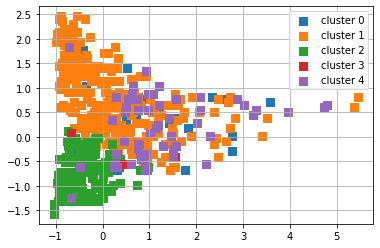

In [334]:
plot_clusters(x_stan,y_stan)

In [336]:
pd.Series(y_stan).value_counts()

1    312
2    262
4     55
0     32
3      3
dtype: int64

In [331]:
km = KMeans(n_clusters=5,
            init='k-means++',
            n_init=10,
            random_state=0)
y_rob = km.fit_predict(x_rob)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



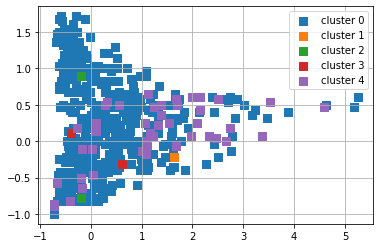

In [332]:
plot_clusters(x_rob,y_rob)

In [ ]:
pca = PCA()
pca.fit(x_stan)

x_pca = pca.transform(x_stan)

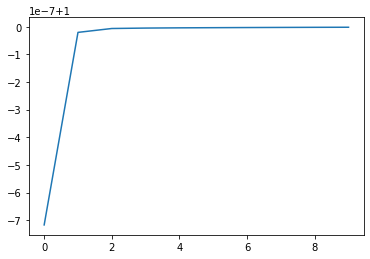

In [342]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [345]:
pca=PCA(n_components=2)
x_pca = pca.fit_transform(x_stan)
df = pd.concat([pd.DataFrame(x_pca),pd.DataFrame(y_stan,columns=['clust'])],axis=1)
df.columns = ['PC1','PC2','clust']
px.scatter(df, x='PC1',y='PC2',color='clust')

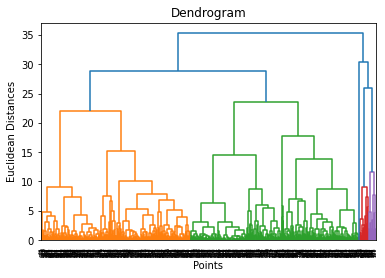

In [350]:
plot_dendrogram(x_stan)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



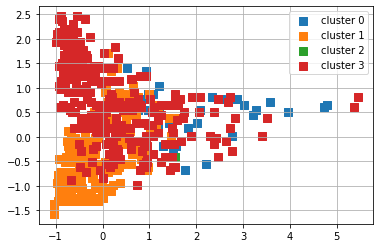

In [356]:
hier_stan = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
y_hir_stan = hier_stan.fit_predict(x_stan)
plot_clusters(x_stan,y_hir_stan)

In [359]:
test_clust = new_clust[['income','age','number_save_tran','final_balance']]
test_clust

,income,age,number_save_tran,final_balance
0,6605,71,19.0,-156.823333
1,18548,38,48.0,-180.635000
2,47668,54,12.0,-925.666667
3,44554,59,12.0,-4109.160000
4,0,16,24.0,-219.143333
...,...,...,...,...
659,14795,36,0.0,-1685.040000
660,26387,56,28.0,613.145000
661,61300,50,0.0,4159.705000
662,15100,37,0.0,-494.345000


In [365]:
x_stan = standard.fit_transform(test_clust)#4
x_rob = robust.fit_transform(test_clust)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



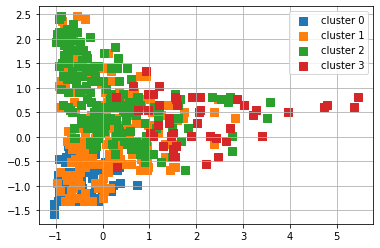

In [370]:
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            random_state=0)
y_stan = km.fit_predict(x_stan)
plot_clusters(x_stan, y_stan)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



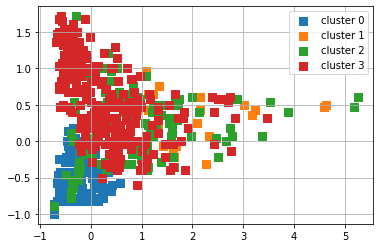

In [375]:
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            random_state=0)
y_rob = km.fit_predict(x_rob)
plot_clusters(x_rob, y_rob)

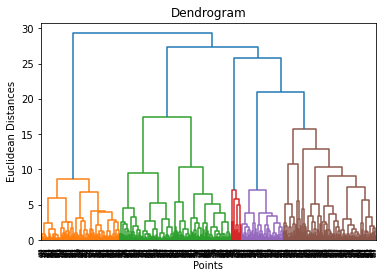

In [376]:
plot_dendrogram(x_stan)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



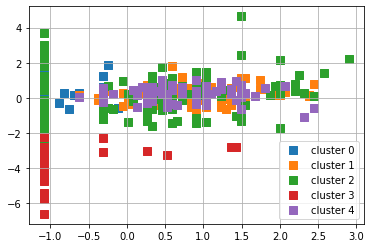

In [382]:
hier_stan = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
y_hir_stan = hier_stan.fit_predict(x_stan)
plot_clusters(x_stan,y_hir_stan)

In [380]:
pd.Series(y_hir_stan).value_counts()

0    221
2    183
1    157
4     83
3     20
dtype: int64

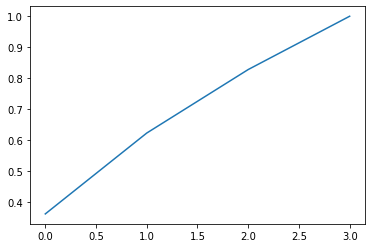

In [383]:
pca = PCA()
pca.fit(x_stan)

x_pca = pca.transform(x_stan)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [386]:
pca=PCA(n_components=2)
x_pca = pca.fit_transform(x_stan)
df = pd.concat([pd.DataFrame(x_pca),pd.DataFrame(y_hir_stan,columns=['clust'])],axis=1)
df.columns = ['PC1','PC2','clust']
px.scatter(df, x='PC1',y='PC2',color='clust')

In [397]:
random_df = pd.concat([test_clust,pd.Series(y_hir_stan,name='clust')],axis=1)
random_df

,income,age,number_save_tran,final_balance,clust
0,6605,71,19.0,-156.823333,4
1,18548,38,48.0,-180.635000,1
2,47668,54,12.0,-925.666667,2
3,44554,59,12.0,-4109.160000,3
4,0,16,24.0,-219.143333,1
...,...,...,...,...,...
659,14795,36,0.0,-1685.040000,0
660,26387,56,28.0,613.145000,2
661,61300,50,0.0,4159.705000,2
662,15100,37,0.0,-494.345000,0


In [398]:
random_df[random_df['income']==0]

,income,age,number_save_tran,final_balance,clust
4,0,16,24.0,-219.143333,1
9,0,15,41.0,1403.830000,1
12,0,17,33.0,500.360000,1
29,0,15,22.0,685.860000,1
43,0,13,12.0,1.800000,0
...,...,...,...,...,...
629,0,17,0.0,-99.790000,0
638,0,15,26.0,-150.900000,1
640,0,13,21.0,370.430000,1
641,0,17,26.0,-402.336667,1


In [404]:
random_df[random_df['clust'] == 3].describe()

,income,age,number_save_tran,final_balance,clust
count,20.000000,20.000000,20.00000,20.000000,20.0
mean,64585.350000,51.200000,7.35000,-6337.174417,3.0
std,27153.688646,9.698616,13.05565,1872.163488,0.0
min,29241.000000,32.000000,0.00000,-11029.145000,3.0
25%,46342.000000,45.750000,0.00000,-6947.511250,3.0
50%,56760.000000,53.500000,0.00000,-5753.167500,3.0
75%,70122.500000,58.000000,12.00000,-5161.363333,3.0
max,129196.000000,68.000000,39.00000,-3969.440000,3.0


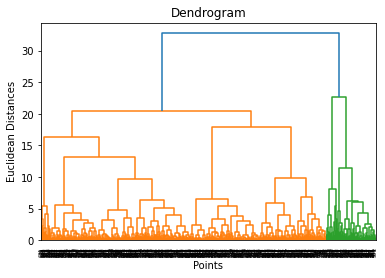

In [377]:
plot_dendrogram(x_rob)

In [406]:
new_clust

,income,age,number_cheq_tran,number_save_tran,number_cred_tran,avg_save_tran_amt,avg_cred_tran_amt,avg_cheq_tran_amt,final_balance
0,6605,71,52.0,19.0,32.0,-33.623158,-47.987187,-26.513269,-156.823333
1,18548,38,0.0,48.0,68.0,0.197917,5.588676,0.000000,-180.635000
2,47668,54,93.0,12.0,15.0,0.755833,160.443333,-5.203548,-925.666667
3,44554,59,99.0,12.0,22.0,0.315000,317.147727,-54.895859,-4109.160000
4,0,16,99.0,24.0,63.0,37.097083,-15.176190,-25.734949,-219.143333
...,...,...,...,...,...,...,...,...,...
659,14795,36,44.0,0.0,0.0,0.000000,0.000000,-38.292273,-1685.040000
660,26387,56,0.0,28.0,27.0,-2.632500,-47.680370,0.000000,613.145000
661,61300,50,99.0,0.0,28.0,0.000000,-328.571429,-8.894848,4159.705000
662,15100,37,99.0,0.0,75.0,0.000000,0.247333,-10.008081,-494.345000


# <u>Feature Engi - Customer Cluster</u>

In [3]:
cust

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,35241,Birmingham,AL


first cluster, 4d before dummies

In [4]:
clust_1 = cust[['income','age','gender','state_code']]

convert to dummies and clean a bit

In [5]:
# simple boolean dummy for gender
clust_1['gender_dummy'] = clust_1['gender'].replace({'M':1,'F':0})

# expand state dummy into boolean dummy
df_dummy = pd.get_dummies(clust_1['state_code'])

# concat and drop old dummies
clust_1 = pd.concat([clust_1,df_dummy], axis=1)
clust_1 = clust_1.drop(['gender','state_code'],axis=1)


# People under 18 have no income, can't get credit cards and are not valuable to our data.
clust_1 = clust_1[clust_1['age'] > 18]

C:\Users\John\AppData\Local\Temp\ipykernel_19932\4042773886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust_1['gender_dummy'] = clust_1['gender'].replace({'M':1,'F':0})


In [6]:
px.scatter(clust_1,clust_1.groupby('age').income.mean().values,np.sort(clust_1.age.unique()))

In [7]:
px.scatter_3d(clust_1, x='age',y='income', z='gender_dummy')

^ This pattern will come up later

# Scaling

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [9]:
clust_1

,income,age,gender_dummy,AL,AZ,CA,CO,DC,FL,GA,...,NY,OH,OK,OR,PA,TN,TX,VA,WA,WI
0,26150,46,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6605,71,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18548,38,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47668,54,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44554,59,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,2289,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
742,14795,36,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,26387,56,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
744,61300,50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We found out a robust scaler is much better than standard

In [10]:
robScale = RobustScaler()

In [11]:
robScale.fit(clust_1)

RobustScaler()

In [12]:
x = robScale.transform(clust_1)

In [13]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            random_state=0)

In [14]:
y_km = km.fit_predict(x)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [15]:
def plot_clusters(x,y_res,plt_cluster_centers = False):
    x_centroids = []
    y_centroids = []

    for cluster in set(y_res):
        X = x[y_res == cluster,0]
        Y = x[y_res == cluster,1]

        x_centroids.append(np.mean(X))
        y_centroids.append(np.mean(Y))
        plt.scatter(X,
                    Y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    if plt_cluster_centers:
        plt.scatter(x_centroids,
                    y_centroids,
                    marker='*',
                    c='magenta',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

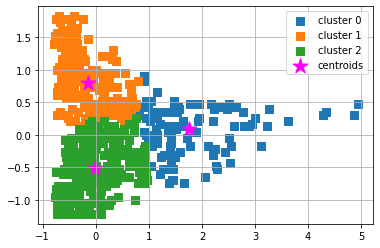

In [16]:
plot_clusters(x,y_km,plt_cluster_centers=True)

In [17]:
def plot_elbow(X, max_clusters = 10):
    joints = []
    for i in range(1,max_clusters+1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        joints.append(km.inertia_)
    tmp_df = pd.DataFrame({'Number of Clusters' : range(1,max_clusters+1),'Joints':joints})
    fig=px.line(tmp_df, x= 'Number of Clusters',y='Joints',markers=True)
    fig.show()
    

In [301]:
plot_elbow(x)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a m

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
def plot_elbow_sil(X, max_clusters = 10):
    joints = []
    for i in range(2,max_clusters+2):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        y_db = km.fit_predict(X)
        joints.append(silhouette_score(X,y_db))
    tmp_df = pd.DataFrame({'Number of Clusters' : range(1,max_clusters+1),'Joints':joints})
    fig=px.line(joints)
    fig.show()

In [21]:
clust_1['cluster'] = y_km

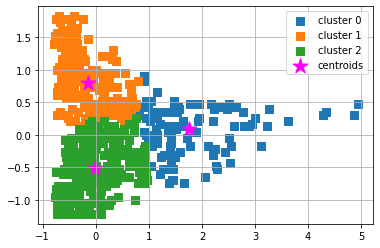

In [22]:
plot_clusters(x,y_km,plt_cluster_centers=True)

# Experiment with PCA with clust_1

In [23]:
from sklearn.decomposition import PCA

In [24]:
robScale.fit(clust_1)
x = robScale.transform(clust_1)

In [25]:
pca = PCA()
pca.fit(x)

x_pca = pca.transform(x)

In [26]:
x_pca.shape

(625, 37)

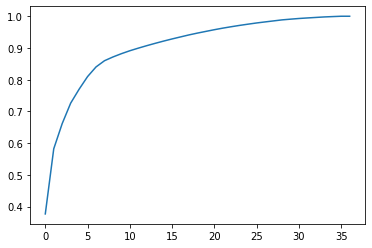

In [27]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [28]:
pca = PCA(n_components=4)
pca.fit(x)

x_pca = pca.transform(x)

In [29]:
df = pd.DataFrame(x_pca)
df.columns = ['PC1','PC2','PC3','PC4']

In [30]:
px.scatter_3d(df, x='PC1',y='PC2',z='PC3', color='PC4')

PC3 is mainly representing gender,
PC2 is mainly representing age,
PC1 is mainly representing income,
PC4 is mainly representing people residing in California
(California has the highest occurence of states at ~140)

# Now we will try a more simple cluster

In [31]:
clust_2_simple = clust_1[['income','age','gender_dummy']]

In [32]:
robScale.fit(clust_2_simple)

RobustScaler()

In [33]:
x = robScale.transform(clust_2_simple)

In [34]:
km = KMeans(n_clusters=3,
            n_init=10,
            random_state=0)

In [35]:
y_xr = km.fit_predict(x)
clust_2_simple = pd.concat([clust_2_simple,pd.Series(y_xr, name='cluster')],axis=1)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [36]:
set(y_xr)

{0, 1, 2}

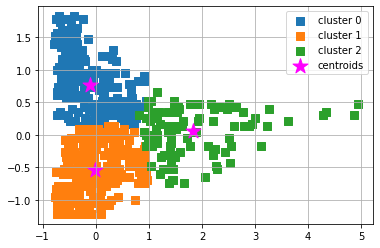

In [37]:
plot_clusters(x,y_xr,plt_cluster_centers=True)

In [38]:
plot_elbow(x)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a m

# PCA for simple cluster

In [39]:
pca = PCA(n_components=3)
pca.fit(x)

PCA(n_components=3)

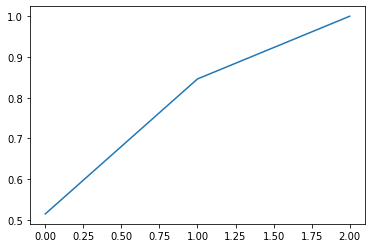

In [40]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

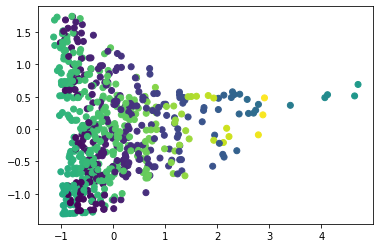

In [41]:
pca = PCA(n_components=3)
pca.fit(x)
x_pca = pca.transform(x)
plt.scatter(x_pca[:,0],x_pca[:,1],c=x_pca[:,2])

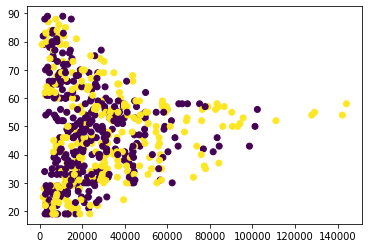

In [42]:
plt.scatter(clust_2_simple.income,clust_2_simple.age,c=clust_2_simple.gender_dummy)

In [43]:
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

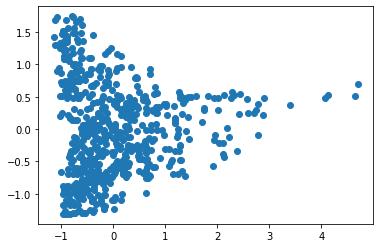

In [44]:
plt.scatter(x_pca[:,0],x_pca[:,1])

# Most Intricate Dataframe

In [45]:
cust.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,98186.000000


In [46]:
complex_clust = cust[['income','age','years_with_bank','nbr_children','gender','marital_status','name_prefix','postal_code','state_code']]

In [47]:
cust.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,98186.000000


In [48]:
complex_clust['parent'] = complex_clust['nbr_children'].transform(lambda x: x > 0).map({True:1,False:0})

C:\Users\John\AppData\Local\Temp\ipykernel_19932\1918214793.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
complex_clust['gender'] = complex_clust['gender'].replace({'M':1,'F':0})

C:\Users\John\AppData\Local\Temp\ipykernel_19932\3123557935.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
complex_clust['has_prefix'] = complex_clust['name_prefix'].transform(lambda x: x != '').map({True:1,False:0})

In [51]:
cust[ (cust.postal_code.astype(str).str.startswith('7'))].state_code.value_counts()

TX    83
OK    16
NJ    12
LA     3
Name: state_code, dtype: int64

MA and NJ are problems. Switch everything that has a length of 4 to start with 1

In [52]:
complex_clust.loc[(complex_clust.postal_code.astype(str).str.len()==4),'postal_code'] = 1

In [53]:
complex_clust['postal_code'] = complex_clust['postal_code'].astype(str).str[0]

In [54]:
tmp_dummies = pd.get_dummies(complex_clust['state_code'])

In [55]:
complex_clust = pd.concat([complex_clust,tmp_dummies], axis=1)

In [56]:
post_dummies = pd.get_dummies(complex_clust.postal_code,prefix='region')


In [57]:
complex_clust = pd.concat([complex_clust,post_dummies],axis=1)

In [58]:
complex_clust.drop(['nbr_children','name_prefix','postal_code','state_code'],axis=1,inplace=True)

49 dimensions

onto PCA

In [59]:
pca = PCA()
pca.fit(complex_clust)

PCA()

In [60]:
x = pca.transform(complex_clust)

In [61]:
pca.explained_variance_ratio_

array([9.99999283e-01, 6.97076783e-07, 1.40472692e-08, 1.54330711e-09,
       8.46091327e-10, 5.67748126e-10, 5.10448608e-10, 4.15095988e-10,
       3.90763697e-10, 2.77668151e-10, 2.54820258e-10, 1.90956435e-10,
       1.58641555e-10, 1.21607433e-10, 1.00369493e-10, 9.20654494e-11,
       8.27345338e-11, 6.53663637e-11, 6.26983606e-11, 5.27250838e-11,
       4.52407569e-11, 4.12902758e-11, 3.98831455e-11, 3.86870857e-11,
       3.81306293e-11, 3.75168475e-11, 2.70682790e-11, 2.67503639e-11,
       2.43995640e-11, 2.28907430e-11, 2.22158286e-11, 1.82301998e-11,
       1.43903541e-11, 1.41757710e-11, 1.29410973e-11, 1.23505535e-11,
       1.05994740e-11, 8.11690443e-12, 6.32523935e-12, 9.98401322e-33,
       9.98401322e-33, 9.98401322e-33, 9.98401322e-33, 9.98401322e-33,
       9.98401322e-33, 9.98401322e-33, 9.98401322e-33, 9.98401322e-33,
       9.98401322e-33])

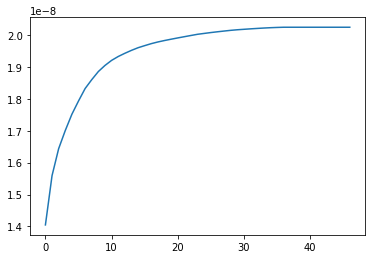

In [62]:
plt.plot(np.cumsum(pca.explained_variance_ratio_[2:]))

In [63]:
pca = PCA(n_components=10)
pca.fit(complex_clust)
x = pca.transform(complex_clust)

In [64]:
plot_elbow(x)

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a m

c:\Users\John\anaconda3\envs\py_test_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



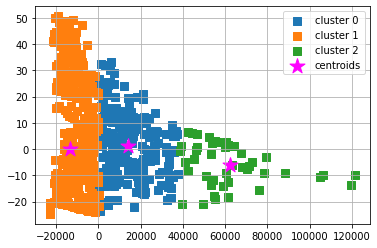

In [65]:
km = KMeans(n_clusters=3,
            n_init=10,
            random_state=0)
y = km.fit_predict(x)
plot_clusters(x,y,plt_cluster_centers=True)

In [66]:
tmp_srs = pd.Series(y,name='cluster')

In [67]:
complex_clust = pd.concat([complex_clust,tmp_srs],axis=1,)

In [68]:
complex_clust.columns = ['income', 'age', 'years_with_bank', 'gender', 'marital_status',
       'parent', 'has_prefix', 'AL', 'AZ', 'CA', 'CO', 'DC', 'FL', 'GA', 'HI',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'NB', 'NC',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'TN', 'TX', 'VA', 'WA',
       'WI', 'near_NY', 'near_VA', 'near_FL', 'near_OH', 'near_MN',
       'near_MI', 'near_TX', 'near_CO', 'near_CA', 'cluster']

## Comparing clusters

- 1 = north east / New York
- 2 = east / Virginia
- 3 = south east / Florida
- 4 = center east / Ohio
- 5 = center north east / Minnesota
- 6 = center center east / missouri
- 7 = south / Texas
- 8 = south west / Colorado
- 9 = west west / California

In [69]:
complex_clust[complex_clust['cluster'] == 2].describe()

,income,age,years_with_bank,gender,marital_status,parent,has_prefix,AL,AZ,CA,...,near_NY,near_VA,near_FL,near_OH,near_MN,near_MI,near_TX,near_CO,near_CA,cluster
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,84921.363636,49.590909,3.954545,0.636364,2.227273,0.522727,0.454545,0.0,0.022727,0.250000,...,0.181818,0.045455,0.068182,0.068182,0.022727,0.159091,0.136364,0.068182,0.250000,2.0
std,20145.032926,7.758920,2.769892,0.486607,0.885638,0.505258,0.503686,0.0,0.150756,0.438019,...,0.390154,0.210707,0.254972,0.254972,0.150756,0.369989,0.347142,0.254972,0.438019,0.0
min,61300.000000,30.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,71503.500000,43.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,80283.000000,52.000000,3.500000,1.000000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
75%,91209.000000,56.000000,6.000000,1.000000,3.000000,1.000000,1.000000,0.0,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,2.0
max,144157.000000,58.000000,8.000000,1.000000,4.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [70]:
clust_1[clust_1['cluster'] == 1].describe()

,income,age,gender_dummy,AL,AZ,CA,CO,DC,FL,GA,...,OH,OK,OR,PA,TN,TX,VA,WA,WI,cluster
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0,212.000000,212.000000,212.0
mean,16978.183962,65.254717,0.415094,0.009434,0.051887,0.127358,0.023585,0.004717,0.014151,0.0,...,0.047170,0.023585,0.009434,0.037736,0.028302,0.108491,0.0,0.018868,0.056604,1.0
std,10697.265328,10.199490,0.493905,0.096898,0.222323,0.334163,0.152111,0.068680,0.118393,0.0,...,0.212504,0.152111,0.096898,0.191008,0.166226,0.311735,0.0,0.136381,0.231631,0.0
min,1039.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
25%,7954.500000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
50%,14534.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
75%,25717.500000,72.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
max,40795.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.0


In [71]:
clust_2_simple[clust_2_simple['cluster'] == 0].describe()

,income,age,gender_dummy,cluster
count,186.000000,186.000000,186.000000,226.0
mean,26500.462366,47.623656,0.473118,0.0
std,22115.066255,16.543743,0.500624,0.0
min,2442.000000,19.000000,0.000000,0.0
25%,12075.250000,35.250000,0.000000,0.0
50%,20512.000000,46.000000,0.000000,0.0
75%,32026.250000,58.000000,1.000000,0.0
max,127848.000000,88.000000,1.000000,0.0


clust_2_simple did a very poor job of clustering based on demographics and instead took 3 clusters having about the same pattern. Cluster 1 complex cluster did a much better job. All clusters chose income as their most important component.

# Based on Banking Behaviour

In [127]:
tran_cheq['type_transaction'] = 'chequing'
tran_cred['type_transaction'] = 'credit'
tran_save['type_transaction'] = 'savings'
new_tran = pd.concat([tran_cheq,tran_cred,tran_save])
all_cust_trans = cust.merge(new_tran, on='cust_id',how='outer')

In [128]:
all_cust_trans

,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,state_code,tran_amt,principal_amt,interest_amt,new_balance,tran_code,type_transaction
0,26150,46,5,1,M,2,,89194,Las Vegas,NV,NaN,NaN,NaN,NaN,NaN,NaN
1,6605,71,1,0,M,2,,90159,Los Angeles,CA,0.00,0.00,0.00,2568.01,IQ,chequing
2,6605,71,1,0,M,2,,90159,Los Angeles,CA,3.60,0.00,3.60,2453.03,IN,chequing
3,6605,71,1,0,M,2,,90159,Los Angeles,CA,2.62,0.00,2.62,2097.29,IN,chequing
4,6605,71,1,0,M,2,,90159,Los Angeles,CA,-154.15,-154.15,0.00,1714.47,TR,chequing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77638,17875,18,3,0,F,1,,90029,Los Angeles,CA,43.72,43.72,0.00,-249.05,PM,credit
77639,17875,18,3,0,F,1,,90029,Los Angeles,CA,-191.29,-191.29,0.00,-191.29,CG,credit
77640,17875,18,3,0,F,1,,90029,Los Angeles,CA,426.05,426.05,0.00,0.00,PM,credit
77641,17875,18,3,0,F,1,,90029,Los Angeles,CA,-79.74,-79.74,0.00,-1000.00,CG,credit


In [88]:
all_cust_trans['parent'] = all_cust_trans['nbr_children'].transform(lambda x: x > 0).map({True:1,False:0})
all_cust_trans['gender'] = all_cust_trans['gender'].replace({'M':1,'F':0})
all_cust_trans['has_prefix'] = all_cust_trans['name_prefix'].transform(lambda x: x != '').map({True:1,False:0})

In [90]:
all_cust_trans.drop(['nbr_children','gender','name_prefix'],axis=1,inplace=True)

In [91]:
all_cust_trans

,income,age,years_with_bank,marital_status,postal_code,city_name,state_code,tran_amt,principal_amt,interest_amt,new_balance,tran_code,type_transaction,parent,has_prefix
0,6605,71,1,2,90159,Los Angeles,CA,0.00,0.00,0.00,2568.01,IQ,chequing,0,0
1,6605,71,1,2,90159,Los Angeles,CA,3.60,0.00,3.60,2453.03,IN,chequing,0,0
2,6605,71,1,2,90159,Los Angeles,CA,2.62,0.00,2.62,2097.29,IN,chequing,0,0
3,6605,71,1,2,90159,Los Angeles,CA,-154.15,-154.15,0.00,1714.47,TR,chequing,0,0
4,6605,71,1,2,90159,Los Angeles,CA,-10.00,-10.00,0.00,2119.95,FP,chequing,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77555,17875,18,3,1,90029,Los Angeles,CA,43.72,43.72,0.00,-249.05,PM,credit,0,0
77556,17875,18,3,1,90029,Los Angeles,CA,-191.29,-191.29,0.00,-191.29,CG,credit,0,0
77557,17875,18,3,1,90029,Los Angeles,CA,426.05,426.05,0.00,0.00,PM,credit,0,0
77558,17875,18,3,1,90029,Los Angeles,CA,-79.74,-79.74,0.00,-1000.00,CG,credit,0,0
